In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:

# Define the file path
file_path = '2d_test_out_v2.txt'

# Read the text file into a pandas DataFrame
df_1d = pd.read_csv("1d_tests_out.txt", sep=" ", header=None)
df_v2 = pd.read_csv(file_path, sep=" ", header=None)
df_v1 = pd.read_csv("2d_test_out.txt", sep=" ", header=None)

# Set appropriate column names
columns1d = ['mode', 'num_points', 'bandwidth'] + [f'iter_{i}' for i in range(1, 4)]
df_1d.columns = columns1d

columnsv1 = ['mode', 'num_points', 'bandwidth'] + [f'iter_{i}' for i in range(1, 4)]
df_v1.columns = columnsv1

columnsv2 = ['mode', 'num_points', 'bandwidth'] + [f'iter_{i}' for i in range(1, 3)]
df_v2.columns = columnsv2

# Display the DataFrame
print(df_v1.head())


FileNotFoundError: [Errno 2] No such file or directory: '1d_tests_out.txt'

In [3]:
df_v2.head()

,mode,num_points,bandwidth,iter_1,iter_2
0,direct_tree,100,0.100,0.000037,0.000027
1,ifgt,100,0.100,0.003689,0.004344
2,direct_tree,100,0.178,0.000055,0.000045
3,ifgt,100,0.178,0.007246,0.006721
4,direct_tree,100,0.316,0.000067,0.000055


In [4]:
df_v1["avg"] = df_v1[[f'iter_{i}' for i in range(1, 4)]].mean(axis=1)

In [5]:
df_1d["avg"] = df_1d[[f'iter_{i}' for i in range(1, 4)]].mean(axis=1)

In [6]:
df_v2["avg"] = df_v2[[f'iter_{i}' for i in range(1, 3)]].mean(axis=1)

In [7]:
df_v1.head()

,mode,num_points,bandwidth,iter_1,iter_2,iter_3,avg
0,direct,100,0.100,0.000233,0.000066,0.000060,0.000120
1,direct_tree,100,0.100,0.000037,0.000029,0.000027,0.000031
2,ifgt,100,0.100,0.007362,0.005239,0.005334,0.005978
3,direct,100,0.178,0.000046,0.000045,0.000044,0.000045
4,direct_tree,100,0.178,0.000044,0.000034,0.000030,0.000036


In [8]:
def plot(df, bandwidth, modes_tested):
      for mode in modes_tested:
        df_trun = df[(df["bandwidth"] == bandwidth) & (df["mode"] == mode)]
        plt.plot(np.log10(df_trun["num_points"]), np.log10(df_trun["avg"]), marker='o', linestyle='-', label = mode)
        plt.grid(True)
        plt.xlabel("log10 number of points")
        plt.ylabel("log10 time in seconds")
        plt.title(f"log-log plot for {bandwidth} bandwidth")
        plt.legend()
        
    

In [9]:
bandwidths = [0.1,0.178,0.316,0.562,0.7,1]

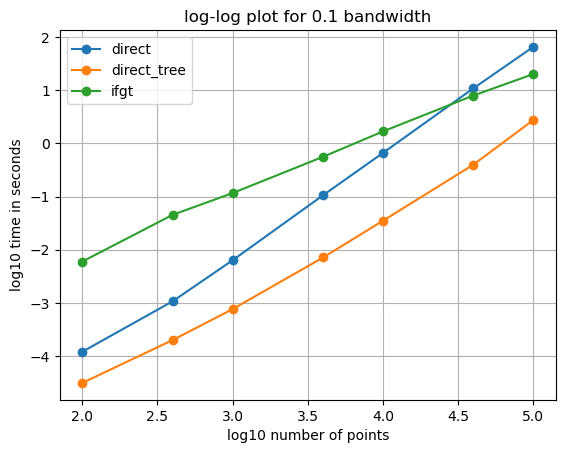

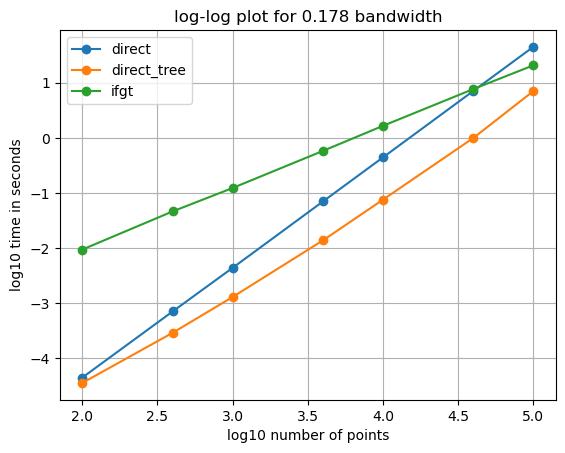

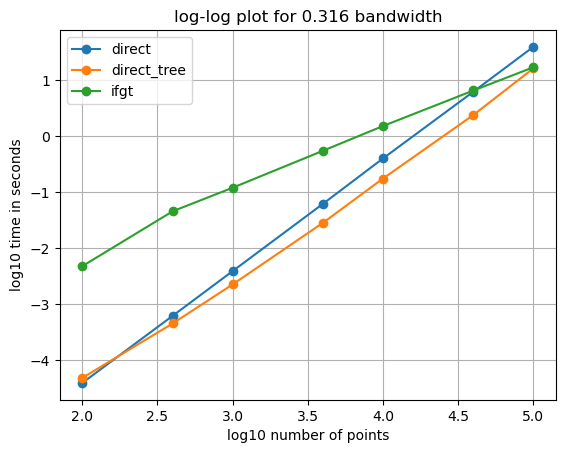

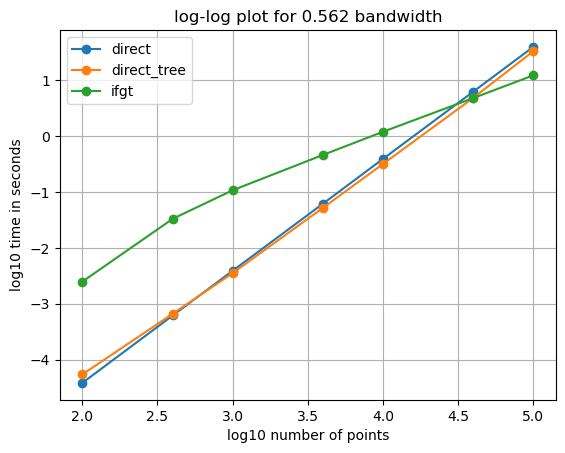

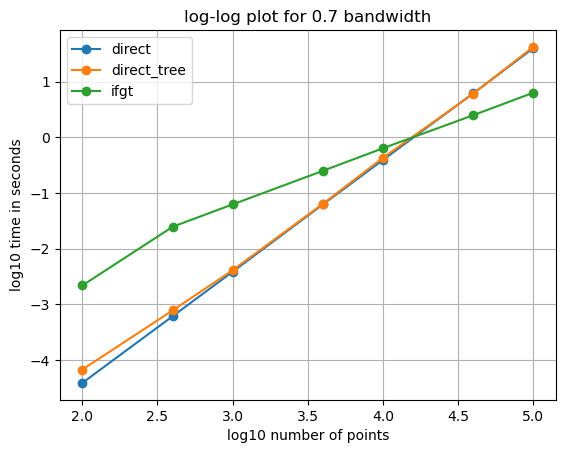

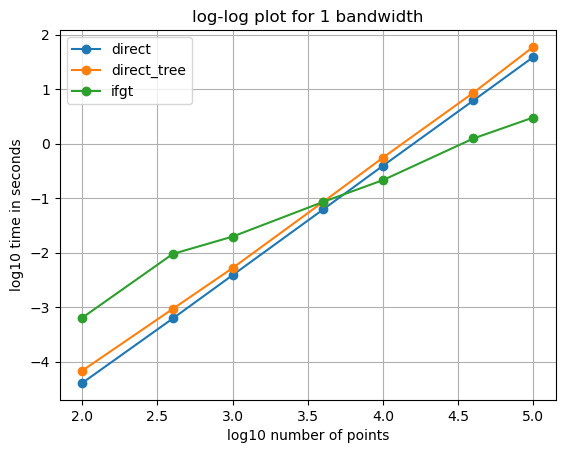

In [10]:
for b in bandwidths:
    plot(df_v1, b, ["direct","direct_tree","ifgt"])
    plt.show()

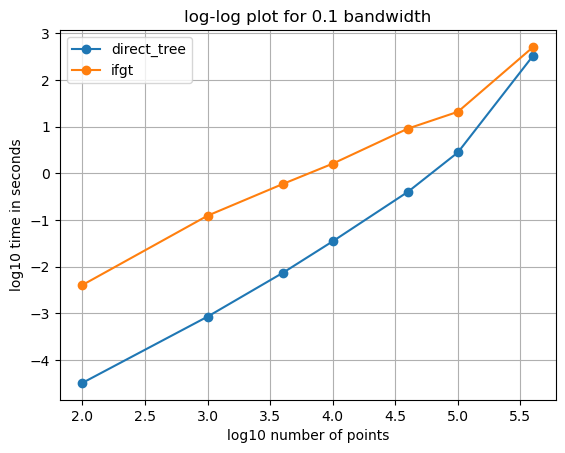

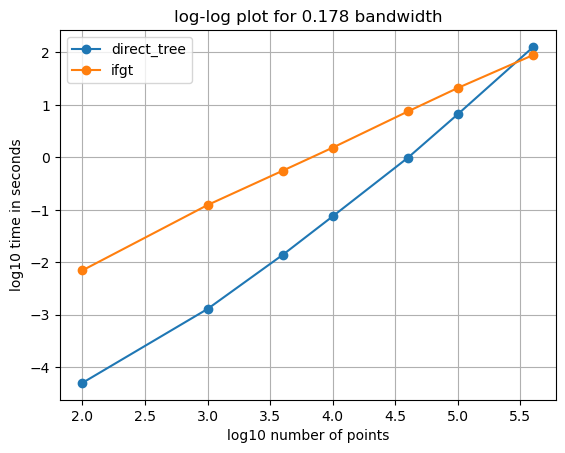

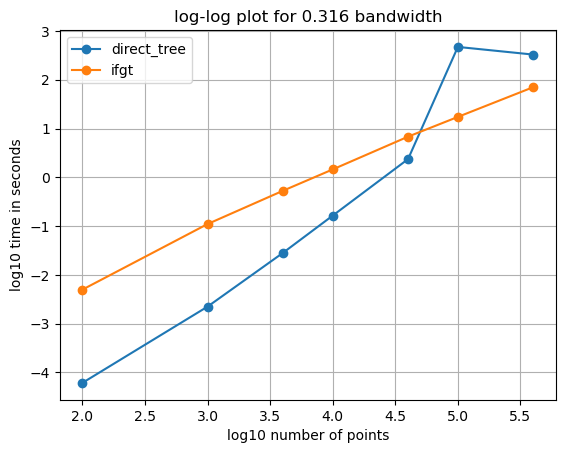

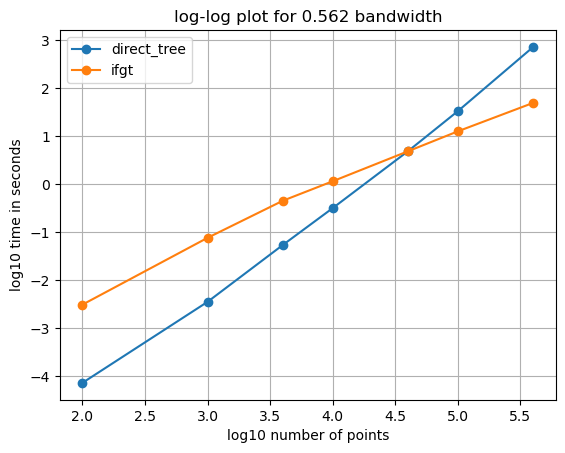

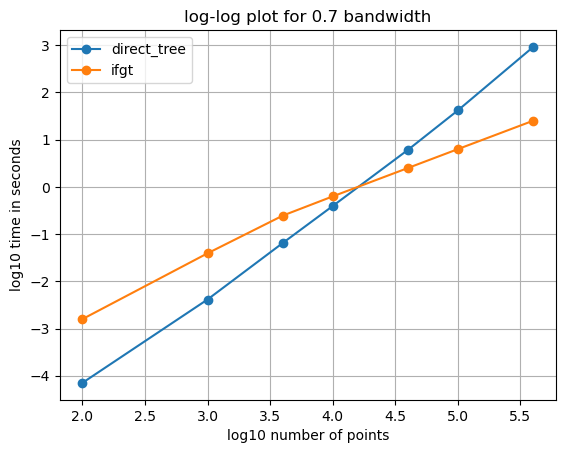

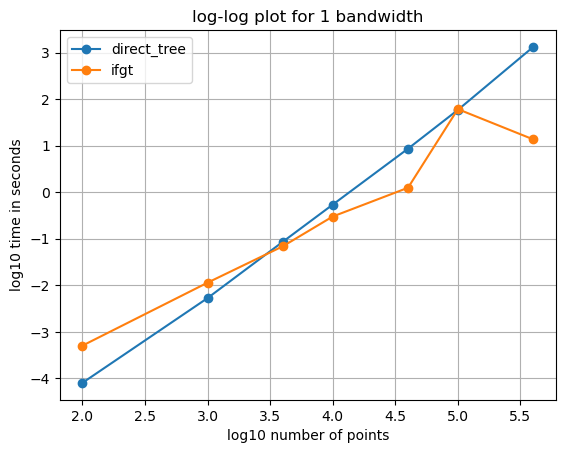

In [11]:
for b in bandwidths:
    plot(df_v2, b, ["direct_tree","ifgt"])
    plt.show()


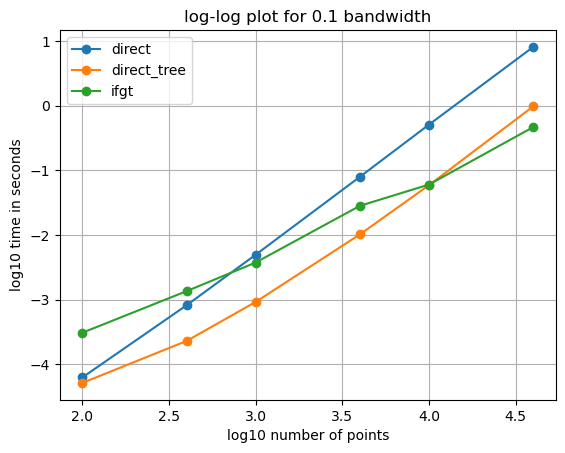

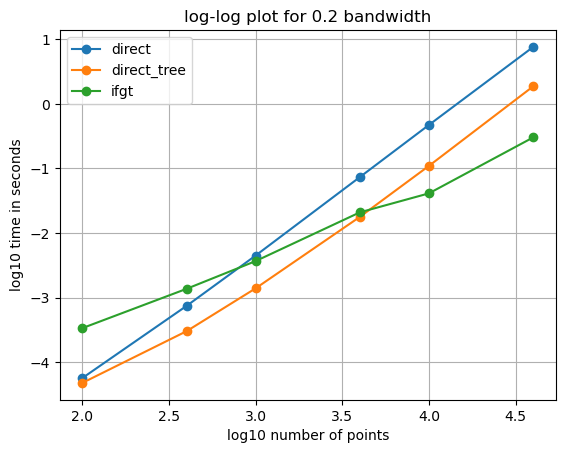

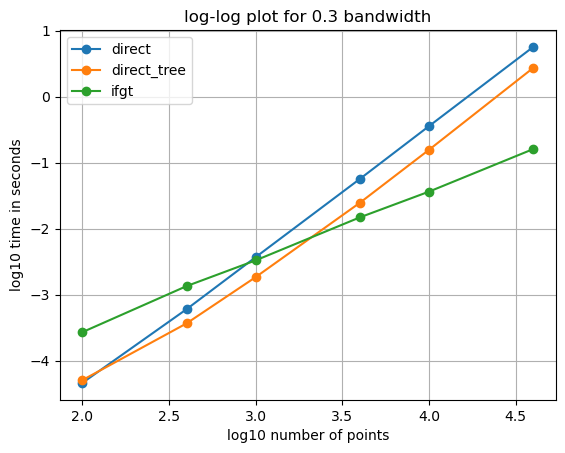

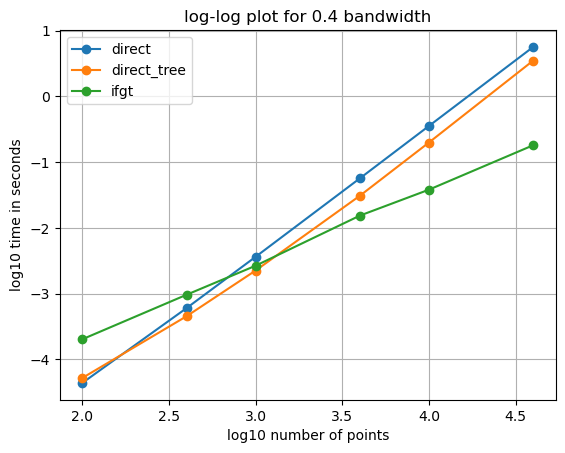

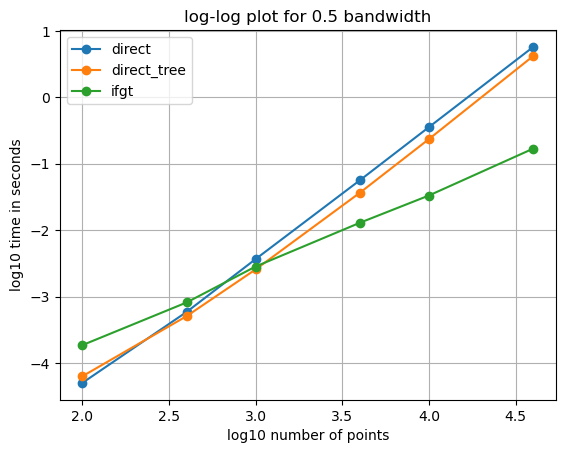

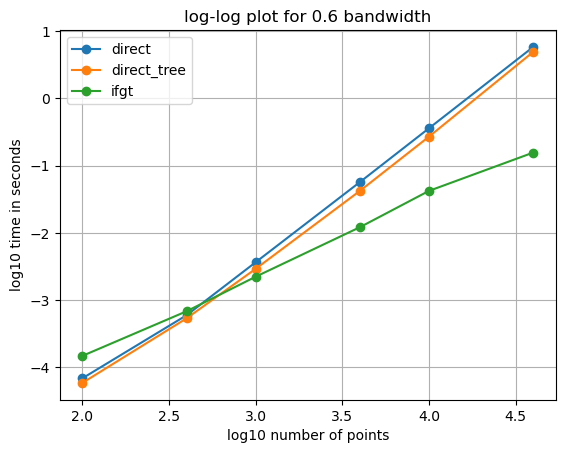

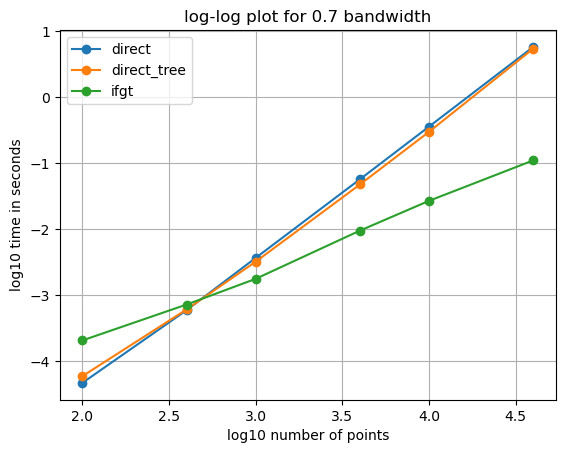

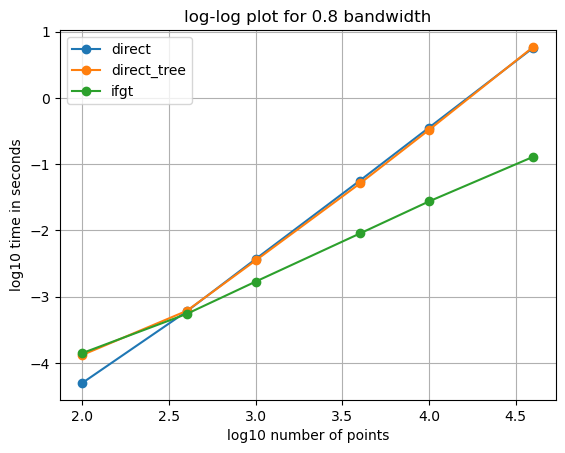

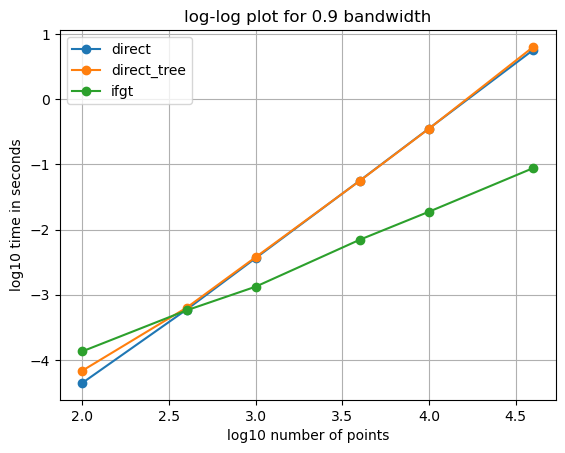

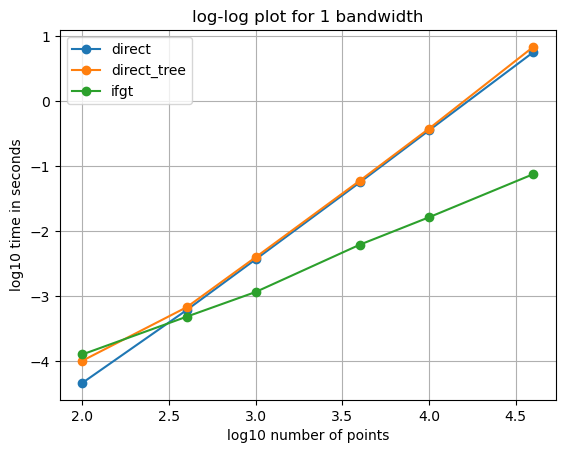

In [12]:
for b in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    plot(df_1d, b, ["direct", "direct_tree","ifgt"])
    plt.show()

In [13]:
def get_avg_time(df, mode, num_points, bandwidth):
    return df[(df["num_points"] == num_points) & (df["bandwidth"] == bandwidth) & (df["mode"] == mode)]["avg"].values[0]

In [14]:
get_avg_time(df_1d, "direct_tree", 10_000, 0.5)

0.23484933333333335

In [15]:
def find_intersection_reigon(bw):
    num_points_lst_1d = [100,400,1_000,4_000,10_000,40_000]

    df_bw = df_1d[df_1d["bandwidth"] == bw]
    df_dt = df_bw[df_bw["mode"] == "direct_tree"][["num_points","avg"]][["num_points","avg"]]
    df_ifgt = df_bw[df_bw["mode"] == "ifgt"][["num_points","avg"]]
    i = 0
    df_time = df_dt[df_dt["num_points"] == num_points_lst_1d[i]]["avg"].values[0]
    ifgt_time = df_ifgt[df_ifgt["num_points"] == num_points_lst_1d[i]]["avg"].values[0]
    #print(df_time, ifgt_time)
    #print(df_dt[df_dt["num_points"] == num_points_lst_1d[i]]["avg"])
    while (df_time < ifgt_time):
        i += 1
        df_time = df_dt[df_dt["num_points"] == num_points_lst_1d[i]]["avg"].values[0]
        ifgt_time = df_ifgt[df_ifgt["num_points"] == num_points_lst_1d[i]]["avg"].values[0]
    return num_points_lst_1d[i-1], num_points_lst_1d[i]

    print(df_ifgt.head())


In [16]:
df_1d.head()

,mode,num_points,bandwidth,iter_1,iter_2,iter_3,avg
0,direct,100,0.1,0.000064,0.000060,0.000063,0.000062
1,direct,100,0.2,0.000056,0.000058,0.000056,0.000057
2,direct,100,0.3,0.000045,0.000045,0.000048,0.000046
3,direct,100,0.4,0.000044,0.000043,0.000045,0.000044
4,direct,100,0.5,0.000045,0.000058,0.000048,0.000050


In [17]:
find_intersection_reigon(0.6)

(400, 1000)

In [18]:
def find_intersection(x_1,y_1,x_2,y_2, x_3, y_3, x_4, y_4):
    m_1 = (y_2 - y_1) / (x_2 - x_1)
    m_2 = (y_4 - y_3) / (x_4 - x_3)
     
    x_inter = ((y_3 - m_2*x_3) - (y_1 - m_1*x_1)) / (m_1-m_2)
    return x_inter

In [19]:
intersect_lst = []
bandwidths_1d = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

for b in bandwidths_1d:
    left_pnt, right_pnt = find_intersection_reigon(b)
    sol = find_intersection(
                            left_pnt, get_avg_time(df_1d, "direct_tree", left_pnt, b),
                            right_pnt, get_avg_time(df_1d, "direct_tree", right_pnt, b),
                            left_pnt, get_avg_time(df_1d, "ifgt", left_pnt, b),
                            right_pnt, get_avg_time(df_1d, "ifgt", right_pnt, b)
                            )
    intersect_lst.append(sol)

In [20]:
print(intersect_lst)

[10079.696663468658, 4260.446292859873, 1387.2586419390811, 1077.8284137469686, 1033.8660631222317, 505.5023923444976, 443.78622021893125, 138.20754716981136, 262.09677419354836, 134.9157733537519]


Text(0.5, 1.0, 'particle count until ifgt is faster then direct_tree vs bandwidth')

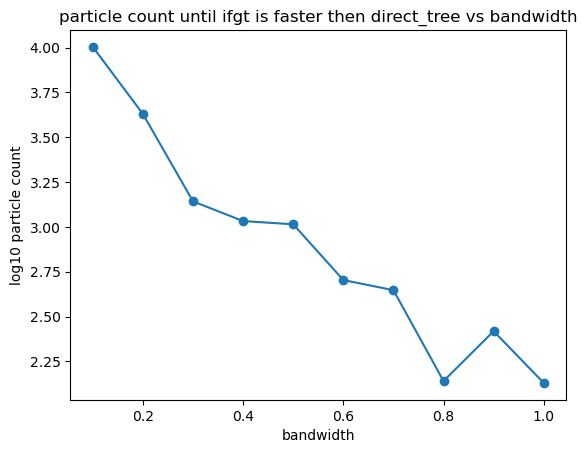

In [21]:
plt.plot(bandwidths_1d, np.log10(intersect_lst), marker='o', linestyle='-')
plt.xlabel("bandwidth")
plt.ylabel("log10 particle count")
plt.title("particle count until ifgt is faster then direct_tree vs bandwidth")